# Homework 2.3 

Load the file constrainedLS.mat into MAT-
LAB. This contains an N ×2 data matrix, data, whose columns correspond to horizontal
and vertical coordinates of a set of 2D data points, dn. It also contains a 2-vector w. Consider
a constrained optimization problem:
$$ min_v∑n(v^T dn)^2, s.t. v^T w = 1.$$
Thus, the constraint on v is that it must lie on a line, perpendicular to ~w, whose perpendicular
distance from the origin is 1/||w||.

### 3.a)

Rewrite the optimization problem in matrix form. Then rewrite the problem in terms
of a new optimization variable,  ̃v (a linear transformation of ~v), such that the quantity
to be minimized is now || ̃v||2. Note: you must also rewrite the constraint in terms of  ̃v.

First, we need to write the problem in matrix terms, with matrix D.
$$ ||Dv||^2 $$ is the same as $$\Sigma (v^Tdn)^2 $$ 
By the definition of the norm.
$$ ||Dv||^2 = ||USV^Tv||^2 = ||USv^*||^2 = ||Uv^{**}||^2 $$
Since U is just a rotational matrix, it doesnt' change the length of vector and can be dropped to 
$$min||v^{**}||^2$$
By the constraint that $$ v\cdot w = 1 $$, we can do a substitution:
$$ v^{**} = (SV^Tv) \rightarrow (VS^{-1}v^{**})\cdot w = (VS^{-1}v^{**})^Tw = v^{**T}S^{-1T}V^Tw = v^{**T}(S^{-1T}V^Tw) = 1 $$
Let $$(S^{-1T}V^Tw) = \tilde{w} $$ Therefore, $$ v^{**}\cdot \tilde{w} = 1 $$


### 3.b)

Since the component of $v^{**}$ that is in line with $\hat{w}$ must always be of length $\frac{1}{||\tilde{w}||}$ , then the smallest $v^{**}$ will be parallel to $\tilde{w}$. Therefore, the smallest $v^{**}$ vector has a length of $\frac{1}{||\tilde{w}||}$ and a direction of $\frac{\tilde{w}}{||\tilde{w}||}$


In [1]:
import os
os.getcwd()

'C:\\Users\\dispe\\OneDrive\\Documents\\GitHub\\NDA'

In [269]:
theta = np.pi/2
rotM90 = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
rotM90

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [337]:
import numpy as np
import numpy.linalg as la
import scipy.io as sio
from os.path import dirname, join as pjoin
import matplotlib.pyplot as plt

data_dir = pjoin(os.getcwd(), 'HW2 files','HW2 files')
mat_fname = pjoin(data_dir, 'constrainedLS.mat')
mat_contents= sio.loadmat(mat_fname)
w = mat_contents['w']
data = mat_contents['data']

U, D, VT = la.svd(data)
S = np.diag(D)
wtilde = (la.inv(S).T@VT@w)
wscaler = 1/la.norm(wtilde)
wUnit = wtilde/la.norm(wtilde)
vss = wscaler * wUnit
# constraintLiness = np.array([-wtilde[1],wtilde[0]])+vss
constraintLiness = rotM90@wtilde+vss

Dss = data@S@VT

In [338]:
x = np.array([vss[0,0],constraintLiness[0,0]])
y = np.array([vss[1,0],constraintLiness[1,0]])
m, b = np.polyfit(x,y,1)

In [339]:
x1 = -30
x2 = 30
y1 = m*(x1) + b
y2 = m*(x2) + b

In [340]:
bestFitVec = rotM90@vss
x = np.array([0,bestFitVec[0,0]])
y = np.array([0,bestFitVec[1,0]])
m, b = np.polyfit(x,y,1)
x1 = -30
x2 = 30
y1BF = m*(x1) + b
y2BF = m*(x2) + b

(-30.0, 30.0)

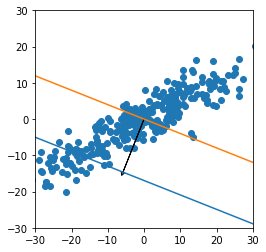

In [341]:
ax = plt.axes()
ax.set_aspect('equal', adjustable='box')
plt.scatter(Dss[:,0], Dss[:,1])
ax.arrow(0, 0, vss[0,0], vss[1,0], head_width=1, head_length=1)
plt.plot([x1,x2],[y1,y2])
plt.plot([x1,x2],[y1BF,y2BF])
plt.xlim(-30,30)
plt.ylim(-30,30)

### 3.c)

As explained above, $$ v^{**} = (SV^Tv) \rightarrow v = (VS^{-1}v^{**})$$

(-5.0, 5.0)

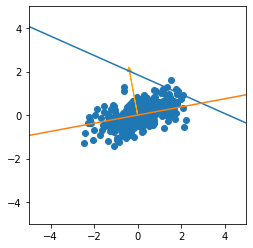

In [343]:
v = VT.T@la.inv(S)@vss
bestFitVec = rotM90@v
x = np.array([0,bestFitVec[0,0]])
y = np.array([0,bestFitVec[1,0]])
m, b = np.polyfit(x,y,1)
x1 = -20
x2 = 20
y1BF = m*(x1) + b
y2BF = m*(x2) + b

constraintLine = rotM90@w + v
x = np.array([v[0,0],constraintLine[0,0]])
y = np.array([v[1,0],constraintLine[1,0]])
m, b = np.polyfit(x,y,1)
x1 = -20
x2 = 20
y1 = m*(x1) + b
y2 = m*(x2) + b

ax = plt.axes()
plt.scatter(data[:,0], data[:,1])
ax.set_aspect('equal', adjustable='box')
ax.arrow(0, 0, v[0,0], v[1,0], head_width=0.2, head_length=0.2, color='orange')
plt.plot([x1,x2],[y1,y2])
plt.plot([x1,x2],[y1BF,y2BF])
plt.xlim(-5,5)
plt.ylim(-5,5)

Just like with the constrained TLS problem above, the matrix decomposition follows the same pattern:
$$ ||Du||^2 = ||USV^Tu||^2 = ||USu^*||^2 = ||Uu^{**}||^2 = ||u^{**}||^2$$
The constraint is simply that u is a unit vector: $$||u||^2 = 1 \rightarrow ||V^Tu||^2 = ||u^*||^2 = 1$$
since $V^T$ is just a rotation matrix while $S$ is a stretch matrix, $u^*$ has the same norm as $u$, while $u^{**}$ does not have the same norm. Thus it is easier to solve the problem in $u^*$ space.

(-5.0, 5.0)

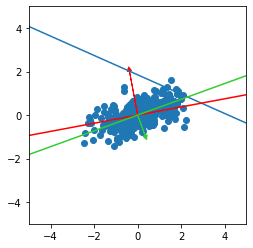

In [350]:
us = np.array([0,1])
u = VT.T@us
TLSVec = rotM90@u
x = np.array([0,TLSVec[0]])
y = np.array([0,TLSVec[1]])
m, b = np.polyfit(x,y,1)
x1 = -20
x2 = 20
y1TLS = m*(x1) + b
y2TLS = m*(x2) + b
# datas = data@VT

ax = plt.axes()
ax.set_aspect('equal', adjustable='box')
plt.scatter(data[:,0], data[:,1])
plt.scatter
ax.arrow(0, 0, v[0,0], v[1,0], head_width=0.2, head_length=0.2, color='red')
ax.arrow(0, 0, u[0], u[1], head_width=0.2, head_length=0.2, color='limegreen')
plt.plot([x1,x2],[y1,y2])
plt.plot([x1,x2],[y1BF,y2BF], color='red')
plt.plot([x1,x2],[y1TLS,y2TLS], color='limegreen')
plt.xlim(-5,5)
plt.ylim(-5,5)

The optimal $\vec{v}$ is not perpendicular to the constraint line in the original space. Additionally, the unconstrained TLS solution (green line) is slightly different from constrained TLS solution (red line). 